# Gridlock Gurus Midterm - Median Gross Rent in LA
## Author
Angie Chapman
## Research question
What is the correlation between income level, commute time, and rent in the city of Los Angeles?
#### Median Gross Rent
This notebook explores the median rent in each Los Angeles tract. It also identifies the highest and lowest-rent neighborhoods. Higher rent costs in urban centers might lead individuals to live further away, where housing is more affordable, potentially increasing their commute times. 
#### Data Sources: 
- [USC Neighborhood Data for Social Change - LA County Median Gross Rent](https://map.myneighborhooddata.org/?pa=42)
- [2020 Census Tracts - Los Angeles County](https://data.lacounty.gov/datasets/339787e096f94c2dbfbf1909698d6c5c_14/explore?location=33.910486%2C-118.202360%2C7.84)

### 1. Remove all neighborhoods outside of LA city from the Rent df

In [1]:
import pandas as pd

# load rent data file - contains all LA county neighborhoods
rent = pd.read_csv (
    'data/med_rent.csv')
rent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258 entries, 0 to 257
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               258 non-null    object 
 1   year               258 non-null    int64  
 2   denom_renters      254 non-null    float64
 3   Median Gross Rent  254 non-null    float64
 4   Unnamed: 4         0 non-null      float64
dtypes: float64(3), int64(1), object(1)
memory usage: 10.2+ KB


In [2]:
rent.head()

,name,year,denom_renters,Median Gross Rent,Unnamed: 4
0,Irwindale,2022,19.08,1732.31,NaN
1,Pico-Union,2022,11197.24,1205.63,NaN
2,Glendora,2022,5183.45,2107.72,NaN
3,Industry,2022,736.34,1983.81,NaN
4,Sylmar,2022,7163.05,1882.49,NaN


In [3]:
# load LA city neighborhoods data file
cities = pd.read_csv (
    'data/LA_Times_Neighborhood_Boundaries.csv')
cities

,OBJECTID,name
0,1,Adams-Normandie
1,2,Arleta
2,3,Arlington Heights
3,4,Atwater Village
4,5,Baldwin Hills/Crenshaw
...,...,...
109,110,Wilmington
110,111,Windsor Square
111,112,Winnetka
112,113,Woodland Hills


In [4]:
cities.info()
#114 rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   OBJECTID  114 non-null    int64 
 1   name      114 non-null    object
dtypes: int64(1), object(1)
memory usage: 1.9+ KB


In [5]:
# merge to create a df with only LA city neighborhoods
rent_la_city = pd.merge(cities[['name']], rent, on='name', how='inner')
rent_la_city

,name,year,denom_renters,Median Gross Rent,Unnamed: 4
0,Adams-Normandie,2022,4369.40,1380.84,NaN
1,Arleta,2022,1816.72,2173.59,NaN
2,Arlington Heights,2022,5774.95,1478.18,NaN
3,Atwater Village,2022,3009.62,2094.06,NaN
4,Baldwin Hills/Crenshaw,2022,9726.61,1502.50,NaN
...,...,...,...,...,...
105,Wilmington,2022,9559.35,1400.98,NaN
106,Windsor Square,2022,1758.45,2007.46,NaN
107,Winnetka,2022,7198.32,1830.09,NaN
108,Woodland Hills,2022,12169.88,2734.98,NaN


In [6]:
rent_la_city.info()
# dropped 4 rows because no residents in some neighborhoods
#110 rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               110 non-null    object 
 1   year               110 non-null    int64  
 2   denom_renters      110 non-null    float64
 3   Median Gross Rent  110 non-null    float64
 4   Unnamed: 4         0 non-null      float64
dtypes: float64(3), int64(1), object(1)
memory usage: 4.4+ KB


In [7]:
# drop extra columns
rent_la_city = rent_la_city.drop(['Unnamed: 4'], axis=1)
rent_la_city.head()

,name,year,denom_renters,Median Gross Rent
0,Adams-Normandie,2022,4369.40,1380.84
1,Arleta,2022,1816.72,2173.59
2,Arlington Heights,2022,5774.95,1478.18
3,Atwater Village,2022,3009.62,2094.06
4,Baldwin Hills/Crenshaw,2022,9726.61,1502.50


In [8]:
#save new df
rent_la_city.to_csv('data/rent_la_city.csv', index=False)

### 2. Add tracts to rent data
#### Jala's AMI dataframe ('cities') contains neighborhood names and tracts so I use that df to merge on neighborhood names

In [9]:
import pandas as pd

# load data file with tract for mapping
tract = pd.read_csv (
    'data/LAneighborhood_ascend.csv',
    dtype=
    {
        'tract': str #ensures that the columns are read in as strings for leading zeros
    }
                      )
tract.head()

,Unnamed: 0,tract,COMM,med_hh_income,med_hh_income_universe,Total Population,Total Hispanic/Latine Population,Total Non-Hispanic/Latine Population,"Total Non-Hispanic/Latine Population, One Race","Total White, Non-Hispanic/Latine","Total Black, Non-Hispanic/Latine","Total American Indian/American Native, Non-Hispanic/Latine","Total Asian, Non-Hispanic/Latine"
0,413,06037141700,Sherman Oaks,250001.0,1242.0,3096.0,210.0,2886.0,2701.0,2386.0,69.0,2.0,226.0
1,989,06037262100,Bel Air,250001.0,1071.0,3195.0,171.0,3024.0,2855.0,2515.0,44.0,1.0,269.0
2,994,06037262400,Mandeville Canyon,250001.0,1101.0,3242.0,215.0,3027.0,2879.0,2620.0,43.0,4.0,194.0
3,993,06037262303,Brentwood,250001.0,1063.0,3157.0,166.0,2991.0,2844.0,2587.0,49.0,0.0,196.0
4,1191,06037980019,Palisades Highlands,250001.0,37.0,128.0,26.0,102.0,90.0,80.0,5.0,0.0,5.0


In [10]:
unique_count = tract['COMM'].nunique()
unique_count
# 139  neighborhoods

139

In [11]:
tract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1202 entries, 0 to 1201
Data columns (total 13 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Unnamed: 0                                                  1202 non-null   int64  
 1   tract                                                       1202 non-null   object 
 2   COMM                                                        1202 non-null   object 
 3   med_hh_income                                               1184 non-null   float64
 4   med_hh_income_universe                                      1202 non-null   float64
 5   Total Population                                            1202 non-null   float64
 6   Total Hispanic/Latine Population                            1202 non-null   float64
 7   Total Non-Hispanic/Latine Population                        1202 non-null   float64
 8 

In [12]:
# rename column
tract = tract.rename(columns={'COMM': 'name'})

In [13]:
# merge tract data with rent
rent_la = pd.merge(rent_la_city, tract[['name', 'tract']], on='name', how='inner')
rent_la


,name,year,denom_renters,Median Gross Rent,tract
0,Adams-Normandie,2022,4369.40,1380.84,06037222100
1,Adams-Normandie,2022,4369.40,1380.84,06037222200
2,Arleta,2022,1816.72,2173.59,06037119700
3,Arleta,2022,1816.72,2173.59,06037119801
4,Arleta,2022,1816.72,2173.59,06037119003
...,...,...,...,...,...
944,Lake Balboa,2022,3366.05,2050.97,06037132101
945,Lake Balboa,2022,3366.05,2050.97,06037132102
946,Lake Balboa,2022,3366.05,2050.97,06037127603
947,Lake Balboa,2022,3366.05,2050.97,06037127605


In [14]:
rent_la.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 949 entries, 0 to 948
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               949 non-null    object 
 1   year               949 non-null    int64  
 2   denom_renters      949 non-null    float64
 3   Median Gross Rent  949 non-null    float64
 4   tract              949 non-null    object 
dtypes: float64(2), int64(1), object(2)
memory usage: 37.2+ KB


### 3. Merge LA city rent df with Census geojson

In [15]:
import geopandas as gpd

# read in a geojson file
#dtype ensures that the columns are read in as strings for leading zeros
geom = gpd.read_file(
    'data/LA20Census.geojson',
    dtype=
    {
        'CT20':str
    }
)
geom.head()

ERROR 1: PROJ: proj_create_from_database: Open of /opt/conda/share/proj failed


,OBJECTID,CT20,LABEL,Shape__Area,Shape__Length,geometry
0,1,101110,1011.10,1.676519e+06,5565.411341,"POLYGON ((-118.29793 34.26323, -118.29697 34.2..."
1,2,101122,1011.22,3.881001e+06,11695.304277,"POLYGON ((-118.27743 34.25991, -118.27747 34.2..."
2,3,101220,1012.20,1.025452e+06,4688.607147,"POLYGON ((-118.27818 34.25577, -118.27824 34.2..."
3,4,101221,1012.21,5.197057e+05,3378.824327,"POLYGON ((-118.28735 34.25591, -118.28735 34.2..."
4,5,101222,1012.22,4.350619e+05,3685.233312,"POLYGON ((-118.28594 34.25590, -118.28594 34.2..."


In [16]:
# we only really need FIPS and geometry, so let's subset the data
geom = geom[['CT20','geometry']]
geom.head()

,CT20,geometry
0,101110,"POLYGON ((-118.29793 34.26323, -118.29697 34.2..."
1,101122,"POLYGON ((-118.27743 34.25991, -118.27747 34.2..."
2,101220,"POLYGON ((-118.27818 34.25577, -118.27824 34.2..."
3,101221,"POLYGON ((-118.28735 34.25591, -118.28735 34.2..."
4,101222,"POLYGON ((-118.28594 34.25590, -118.28594 34.2..."


In [17]:
# check to see that tract is now an object instead of integer
geom.info(verbose=True, show_counts=True)

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1289 entries, 0 to 1288
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   CT20      1289 non-null   object  
 1   geometry  1289 non-null   geometry
dtypes: geometry(1), object(1)
memory usage: 20.3+ KB


In [18]:
# create a tract column
geom['tract'] ='06' + '037' + geom['CT20']

In [19]:
geom.head()

,CT20,geometry,tract
0,101110,"POLYGON ((-118.29793 34.26323, -118.29697 34.2...",06037101110
1,101122,"POLYGON ((-118.27743 34.25991, -118.27747 34.2...",06037101122
2,101220,"POLYGON ((-118.27818 34.25577, -118.27824 34.2...",06037101220
3,101221,"POLYGON ((-118.28735 34.25591, -118.28735 34.2...",06037101221
4,101222,"POLYGON ((-118.28594 34.25590, -118.28594 34.2...",06037101222


<Axes: >

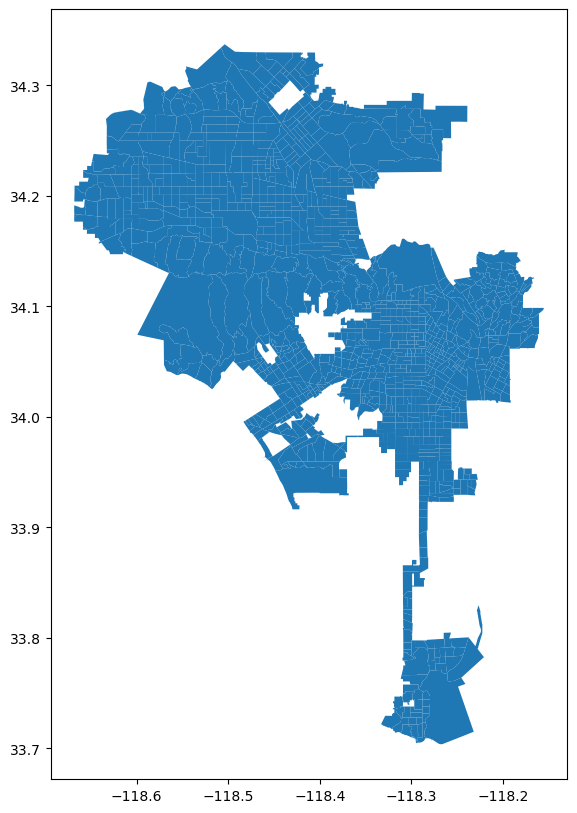

In [20]:
geom.plot(figsize=(12,10))

In [21]:
# create a new dataframe based on the join of geom and df
rent_la2 =geom.merge(rent_la,on="tract")
rent_la2.head()

,CT20,geometry,tract,name,year,denom_renters,Median Gross Rent
0,101110,"POLYGON ((-118.29793 34.26323, -118.29697 34.2...",06037101110,Tujunga,2022,4584.97,1809.4
1,101122,"POLYGON ((-118.27743 34.25991, -118.27747 34.2...",06037101122,Tujunga,2022,4584.97,1809.4
2,101220,"POLYGON ((-118.27818 34.25577, -118.27824 34.2...",06037101220,Tujunga,2022,4584.97,1809.4
3,101221,"POLYGON ((-118.28735 34.25591, -118.28735 34.2...",06037101221,Tujunga,2022,4584.97,1809.4
4,101222,"POLYGON ((-118.28594 34.25590, -118.28594 34.2...",06037101222,Tujunga,2022,4584.97,1809.4


In [22]:
rent_la2.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 949 entries, 0 to 948
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   CT20               949 non-null    object  
 1   geometry           949 non-null    geometry
 2   tract              949 non-null    object  
 3   name               949 non-null    object  
 4   year               949 non-null    int64   
 5   denom_renters      949 non-null    float64 
 6   Median Gross Rent  949 non-null    float64 
dtypes: float64(2), geometry(1), int64(1), object(3)
memory usage: 52.0+ KB


### 3. Map Median Rent in LA city tracts

<Axes: >

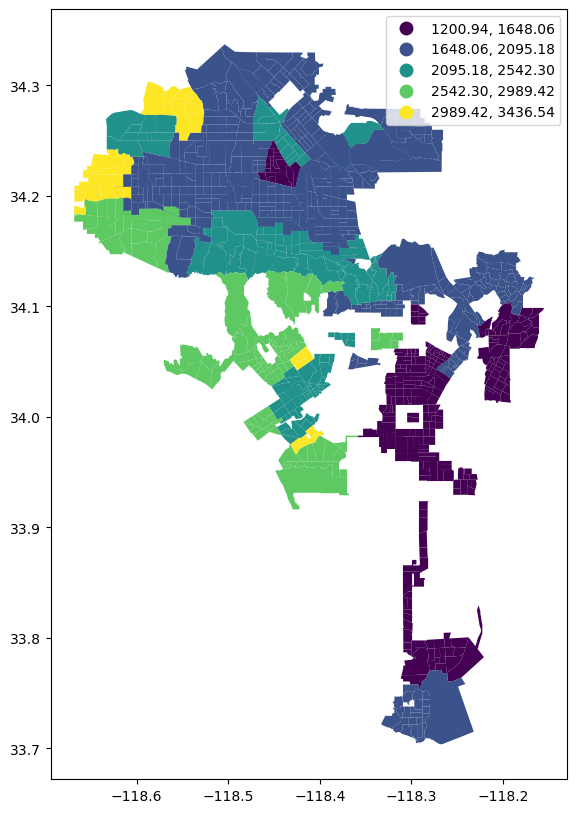

In [23]:
# map of median rent 
rent_la2.plot(figsize=(12,10),
                 column='Median Gross Rent',
                 legend=True, 
                 scheme='equal_interval')

In [24]:
import folium 
rent_map = folium.Map(location=[34.2,-118.2], 
               zoom_start = 9,
               tiles='CartoDB positron', 
               attribution='CartoDB')

# plot chorpleth over the base map
folium.Choropleth(
                  geo_data=rent_la2, # geo data
                  data=rent_la2, # data          
                  key_on='feature.properties.tract', # key, or merge column
                  columns=['tract', 'Median Gross Rent'], # [key, value]
                  fill_color='YlOrRd',
                  line_weight=0.1, 
                  fill_opacity=0.8,
                  line_opacity=0.8, # line opacity (of the border)
                  legend_name='Median Rent ($)').add_to(rent_map)    # name on the legend color bar



rent_map

In [25]:
rent_map.save('rent_map.html')

### 4. Create Table to highest and lowest rent neighborhoods in LA City

In [26]:
# arrange rent values to show top and bottom neighborhoods
arrange = rent_la_city.sort_values(by='Median Gross Rent', ascending=False)

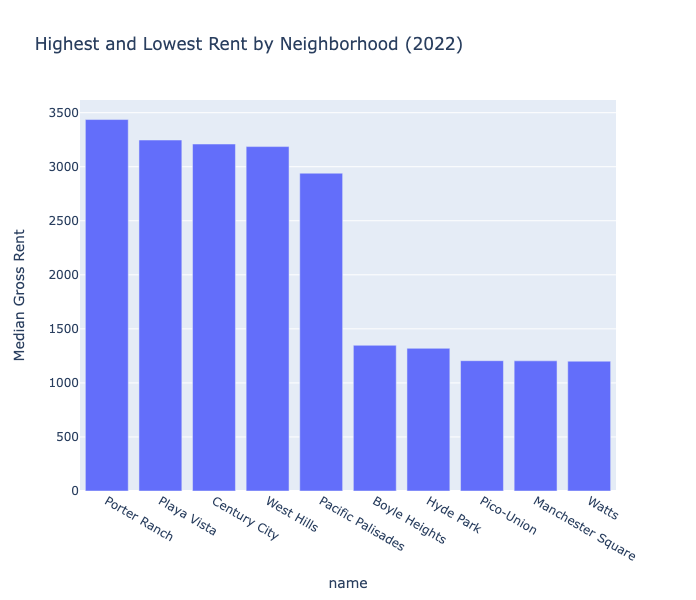

In [74]:
# create table
# for interactive plots
import plotly.express as px

# Filter the DataFrame to include only specific 'grp_description' values
filtered_city = arrange[arrange['name'].isin(['Porter Ranch', 
                                                           'Playa Vista', 'Century City', 'West Hills', 'Pacific Palisades', 
                                                           'Boyle Heights', 'Hyde Park', 'Pico-Union', 'Manchester Square', 
                                                           'Watts'])]

# Plot the filtered data
rent_table = px.bar(filtered_city,
             x='name',
             y='Median Gross Rent',
             title='Highest and Lowest Rent by Neighborhood (2022)',
             width=800,  # Set the width
             height=600)  # Set the height
fig.update_layout(xaxis_title='Neighborhood', yaxis_title='Median Gross Rent')
fig.update_yaxes(tickprefix="$")

rent_table.show()

In [76]:
#save table
rent_table.write_html("MTvisuals/rent_table.html")